In [16]:
from ase.visualize import view
import numpy as np

import matplotlib.pyplot as plt
from pymatgen.io.ase import AseAtomsAdaptor

from waterstructureCreator.load_dictionaries import import_slab_structures, import_bulk_structures
from waterstructureCreator.construct_supercells import get_independent_Supercell_Matrices
from waterstructureCreator.check_polarity import get_structure_polarity
from waterstructureCreator.create_slabs import get_export_subslabs_clean, get_bulk_and_slab
from waterstructureCreator.create_combined_slab import get_export_adsorbed_water_SS, get_isotropic_SS
from get_adsorbed_water_split import *

# Example for finding the most isotropic cell

In [2]:
# Calcualte all independent Supercell Matrices
SuperCellSizes = [6, 12]

allredm = get_independent_Supercell_Matrices(SuperCellSizes)

10000  supercell matrices created
20000  supercell matrices created


In [4]:
for i in allredm.keys():
    print('For',i, 'atoms per layer, we found ',len(allredm[i]['independent']),'independent matrices')

For 6 atoms per layer, we found  12 independent matrices
For 7 atoms per layer, we found  6 independent matrices
For 8 atoms per layer, we found  13 independent matrices
For 9 atoms per layer, we found  13 independent matrices
For 10 atoms per layer, we found  18 independent matrices
For 11 atoms per layer, we found  12 independent matrices
For 12 atoms per layer, we found  26 independent matrices


In [5]:
# Read bulk structures, which were calculated 
# previously by means of DFT.
bulk_structs = import_bulk_structures(filename="metalbulk_waterfilms/bulk_export.json")
print("Materials:", bulk_structs.keys())
print("=++++++++++++++++++++++++++++++++=")

Materials: dict_keys(['Pd', 'Cu', 'Au', 'Pt', 'Ag'])
=++++++++++++++++++++++++++++++++=


In [7]:
# Miller index and number of layers for surfaces.
interface_specs = [[[1,0,0], "(100)", 3], \
                   [[1,1,0] ,"(110)", 4],  \
                   [[1,1,1], "(111)", 6]]

In [8]:
# Create a slab with selected miller indices.
# In this example, we calculate the primitive 
# slab for the Pt(111) surface.  
oriented_primitive_bulk_o, primitive_slab = get_bulk_and_slab(bulk_structs['Pt'],
                                                              miller=interface_specs[2][0],
                                                              layers=interface_specs[2][2],
                                                              vacuum=17.)

# Visualize
view(AseAtomsAdaptor.get_atoms(primitive_slab))

THIS VALUE SHOULD BE 1 ALWAYS 1.0000000000000004


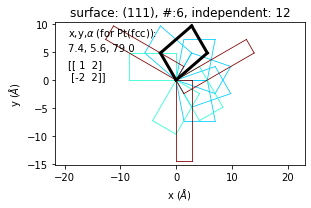

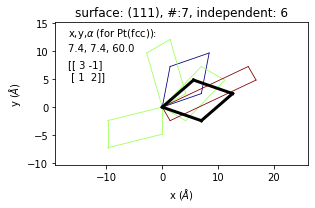

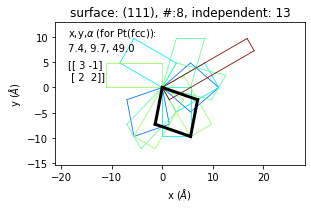

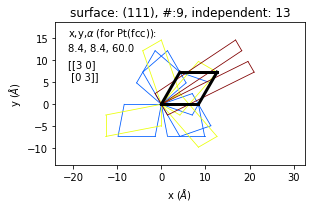

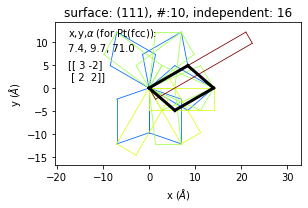

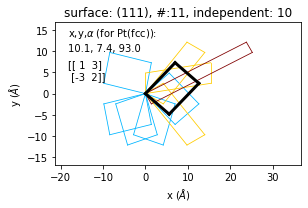

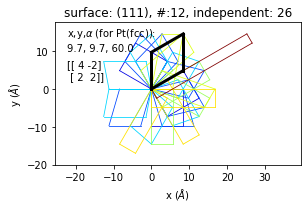

In [15]:
for i in np.arange(SuperCellSizes[0], SuperCellSizes[1]+1):
    # Try out all supercell matrices and find the most isotropic one
    best, allresults_sorted  = get_isotropic_SS(primitive_slab, allredm, i)
    
    # Plot the supercell lattices in xy
    fig = export_lattices(best, allresults_sorted, interface_specs[2][1], i, return_fig=True)
    plt.show()